In [1]:
import logging

from utils.scenario_runner import ScenarioRunner

from metadrive.engine.logger import get_logger

log = get_logger()

In [2]:
md_config = {
    "log_level": logging.INFO,
    "map_config": {
        "type": "block_sequence",
        "config": "XSOCT",  # 20 block
    },
    "use_render": False,
    "traffic_density": 0.0,
}
runner = ScenarioRunner(save_dir="./data", seed=0, ads_fps=10, config=md_config)


[INFO] Saving data to data
[INFO] Environment: MetaDriveEnv
[INFO] MetaDrive version: 0.4.3
[INFO] Sensors: [lidar: Lidar(), side_detector: SideDetector(), lane_line_detector: LaneLineDetector()]
[INFO] Render Mode: none
[INFO] Horizon (Max steps per agent): None
[INFO] Assets version: 0.4.3
[INFO] Known Pipes: glxGraphicsPipe
[INFO] Start Scenario Index: 0, Num Scenarios : 1


In [3]:
map_data = runner.env.current_map.get_meta_data()
block_sequence = map_data["block_sequence"]

del runner

In [4]:
block_sequence = [
    {"id": "I", "pre_block_socket_index": None},
    {
        "id": "X",
        "decrease_increase": 0,
        "change_lane_num": 0,
        "radius": 10.0,
        "pre_block_socket_index": 0,
    },
    {"length": 75.58282470703125, "id": "S", "pre_block_socket_index": 1},
    {
        "id": "O",
        "exit_radius": 5.0,
        "angle": 60.0,
        "inner_radius": 500.137557983398438,
        "pre_block_socket_index": 0,
    },
    {
        "id": "C",
        "angle": 71.0036392211914,
        "length": 51.55717468261719,
        "dir": 0,
        "radius": 35.112525939941406,
        "pre_block_socket_index": 1,
    },
    {
        "id": "T",
        "change_lane_num": 0,
        "t_type": 2,
        "decrease_increase": 1,
        "radius": 10.0,
        "pre_block_socket_index": 0,
    },
]

In [5]:
msg = ""
for i, b in enumerate(block_sequence):
    msg += f"Block {i}: \n"
    msg += f"\t- socket: {b.get('pre_block_socket_index')}\n"
    msg += f"\t- type: {b.get('id')}\n"
    msg += f"\t- length: {b.get('length')}\n"
    msg += f"\t- radius: {b.get('radius')}\n"
    msg += f"\t- angle: {b.get('angle')}\n"
    msg += f"\t- goal: {b.get('goal')}\n"
    msg += f"\t- dir: {b.get('dir')}\n"
    msg += f"\t- radius_inner: {b.get('inner_radius')}\n"
    msg += f"\t- radius_exit: {b.get('exit_radius')}\n"
    msg += f"\t- exit_length: {b.get('exit_length')}\n"
    msg += f"\t- t_intersection_type: {b.get('t_type')}\n"
    msg += f"\t- lane_num: {b.get('lane_num')}\n"
    msg += f"\t- change_lane_num: {b.get('change_lane_num')}\n"
    msg += f"\t- decrease_increase: {b.get('decrease_increase')}\n"
    msg += f"\t- one_side_vehicle_num: {b.get('one_side_vehicle_number')}\n"
    msg += f"\t- extension_length: {b.get('extension_length')}\n"

print(msg)

Block 0: 
	- socket: None
	- type: I
	- length: None
	- radius: None
	- angle: None
	- goal: None
	- dir: None
	- radius_inner: None
	- radius_exit: None
	- exit_length: None
	- t_intersection_type: None
	- lane_num: None
	- change_lane_num: None
	- decrease_increase: None
	- one_side_vehicle_num: None
	- extension_length: None
Block 1: 
	- socket: 0
	- type: X
	- length: None
	- radius: 10.0
	- angle: None
	- goal: None
	- dir: None
	- radius_inner: None
	- radius_exit: None
	- exit_length: None
	- t_intersection_type: None
	- lane_num: None
	- change_lane_num: 0
	- decrease_increase: 0
	- one_side_vehicle_num: None
	- extension_length: None
Block 2: 
	- socket: 1
	- type: S
	- length: 75.58282470703125
	- radius: None
	- angle: None
	- goal: None
	- dir: None
	- radius_inner: None
	- radius_exit: None
	- exit_length: None
	- t_intersection_type: None
	- lane_num: None
	- change_lane_num: None
	- decrease_increase: None
	- one_side_vehicle_num: None
	- extension_length: None
Block 3: 

In [6]:
md_config = {
    "log_level": logging.WARN,
    "map_config": {
        "type": "pg_map_file",
        "config": block_sequence,
    },
    "use_render": False,
    "traffic_density": 0.0,
}

In [7]:
runner = ScenarioRunner(save_dir="./data", seed=0, ads_fps=10, config=md_config)
# runner.run_scenario(repeat=True, dry_run=False, record=True)
del runner


[INFO] Saving data to data


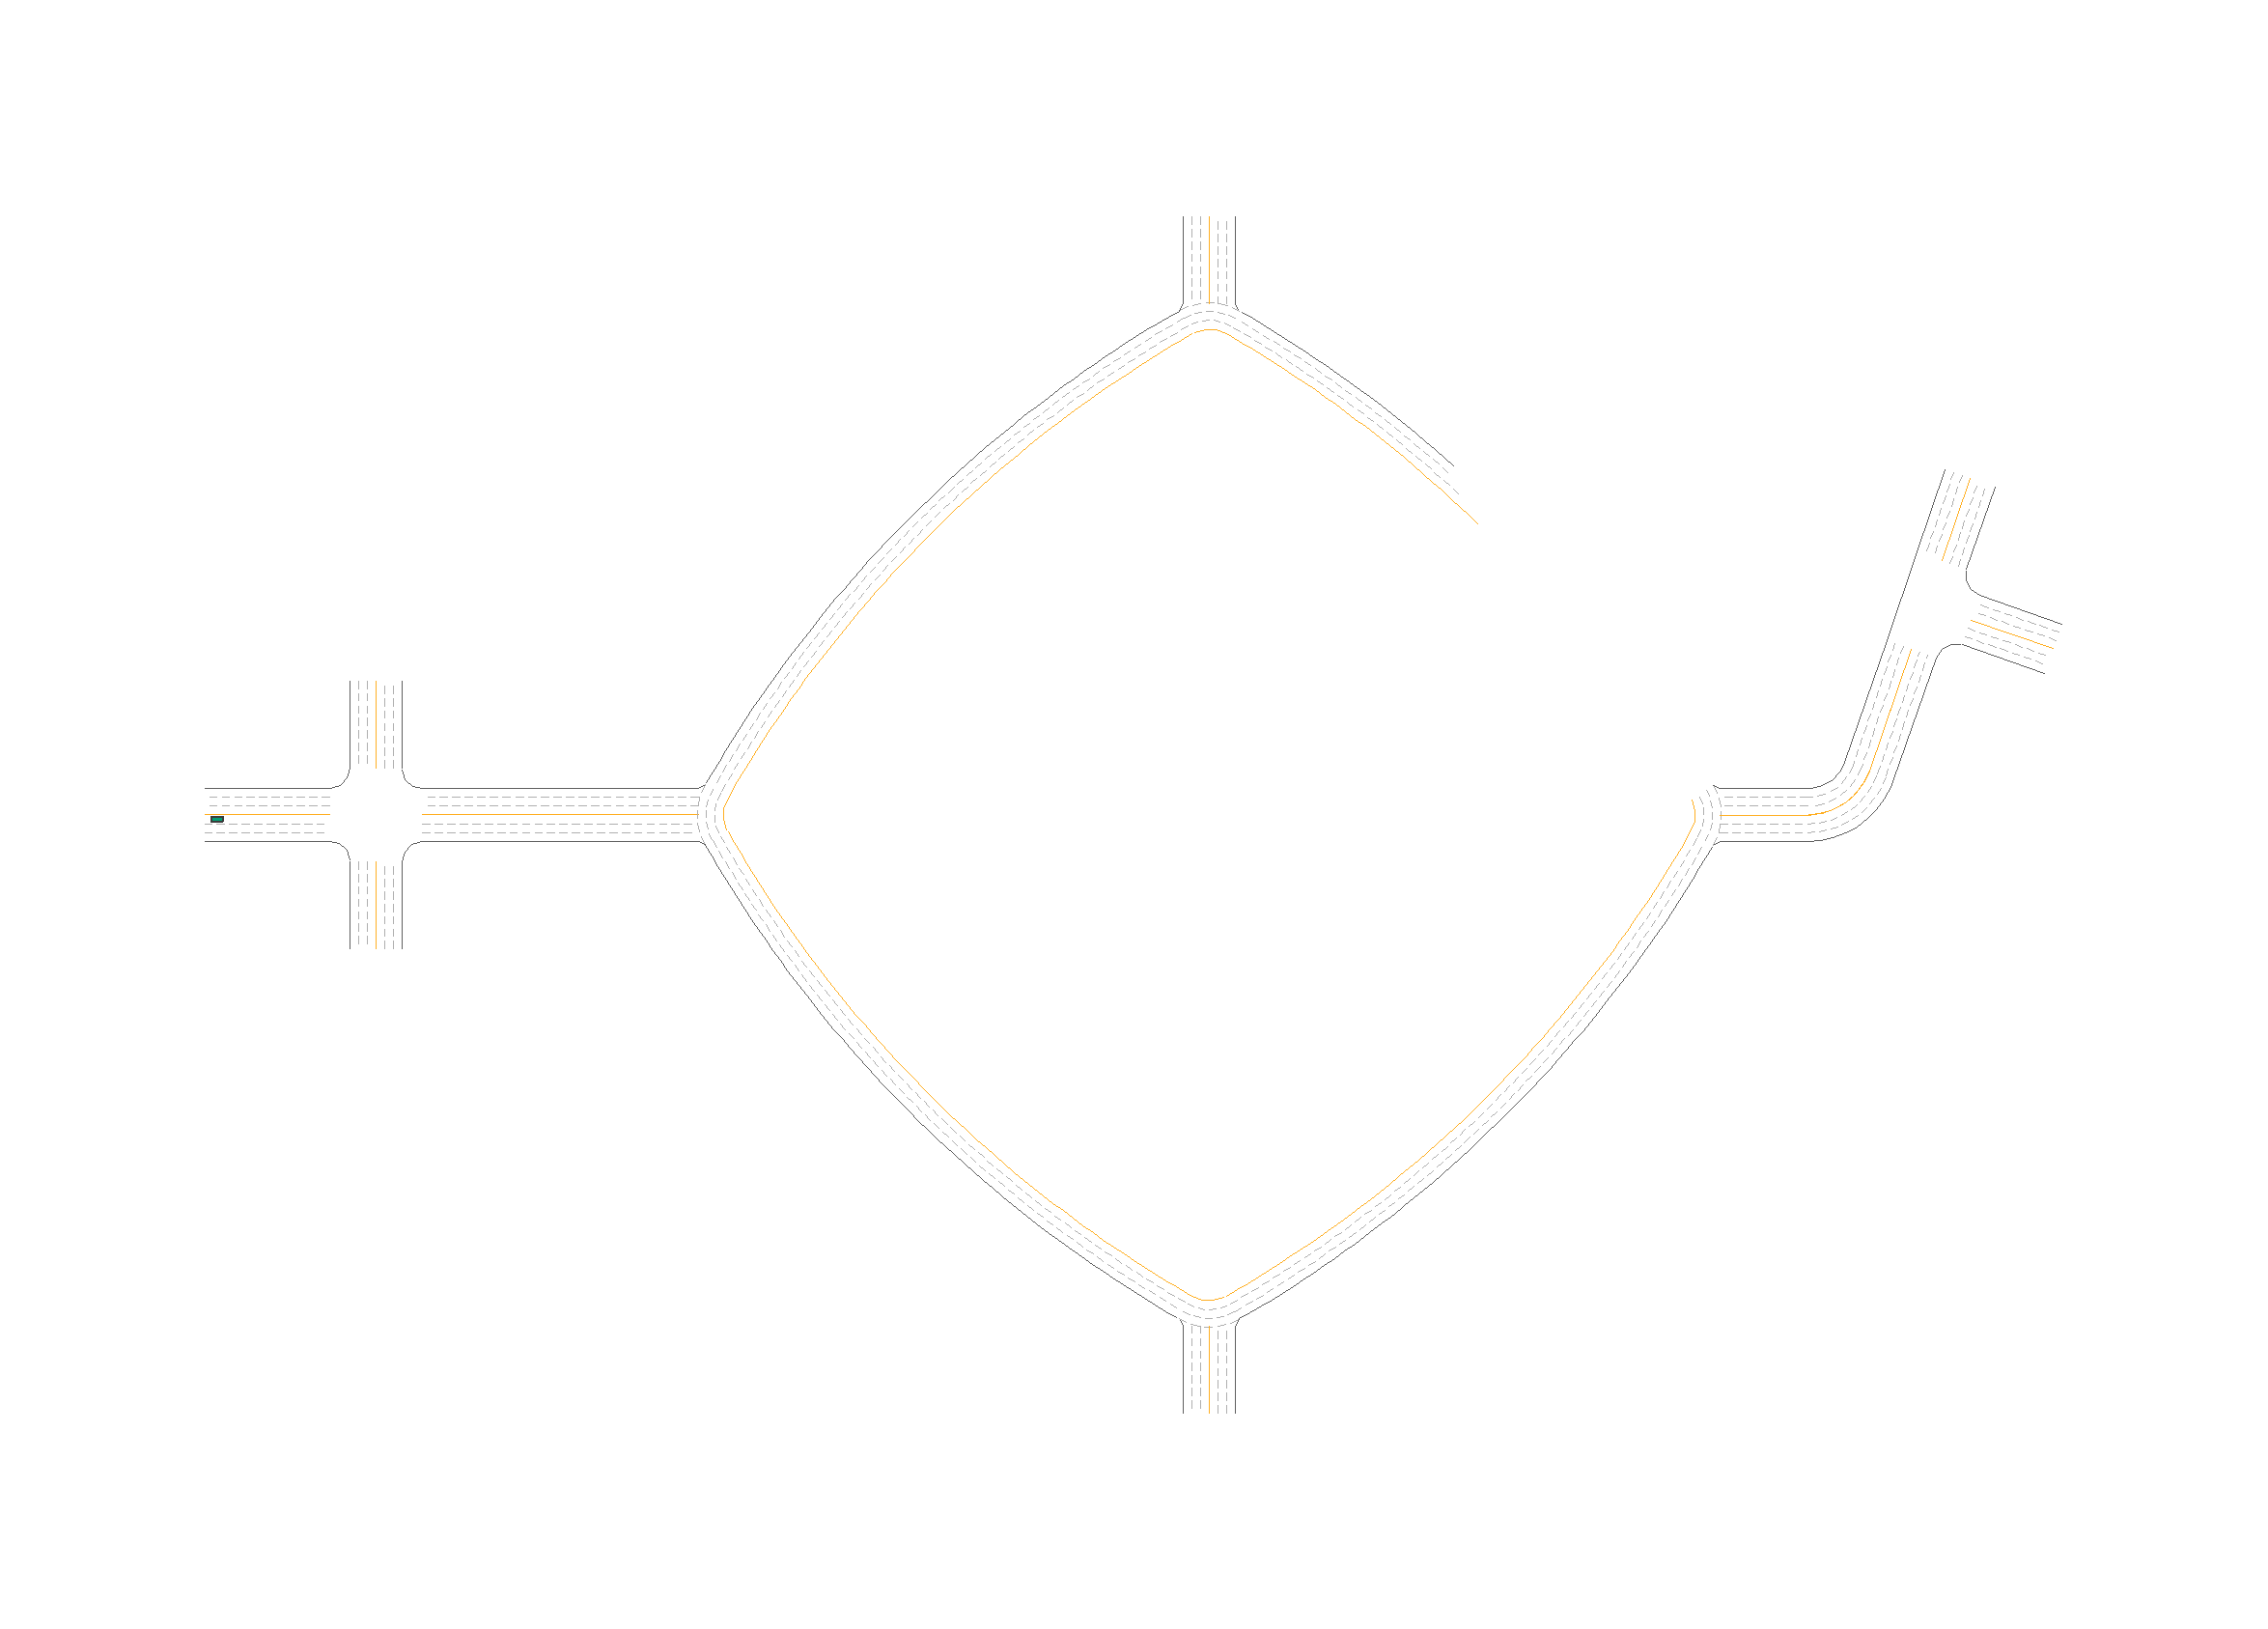

In [8]:
from PIL import Image

img = Image.open("./data/10_0.png")
img